In [1]:
'''
Perception Prime & Dual
'''

'\nPerception Prime & Dual\n'

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
X_train =np.array([[3,3],[4,2],[4,3],[0.5,0.5]],dtype='float')
y_train =np.array([[1],[-1],[1],[-1]],dtype='float')
print('X shape ',X_train.shape)
print('y shape ',y_train.shape)

X shape  (4, 2)
y shape  (4, 1)


In [112]:
def perception_prime(X,y,lr=1,iterations=100000):
    [n,p]=X.shape
    w =np.zeros((p,1),dtype='float')
    b =0
    mask =0
    for it in range(iterations):
        if(mask==1):
            break
        mask =1
        for i in range(n):
            if((y[i]*(np.dot(X[i],w)+b))<=0):
                w = w+lr*y[i]*(X[i].reshape((p,1)))
                b = b+lr*y[i]
                mask =0
                break
    return [w,b]

def perception_dual(X,y,lr=1,iterations=10000):
    [n,p] =X.shape
    b =0
    alpha =np.zeros((n,1),dtype='float')
    gram =np.dot(X,X.T)
    mask =0
    print('y[:,0] ',y[:,0].shape)
    print('alpha[:,0] ',alpha[:,0].shape)
    print('gram[:,i] ',gram[:,0].shape)
    for it in range(iterations):
        if(mask==1):
            break
        mask =1
        for i in range(n):
            if(y[i]*((np.sum(alpha[:,0]*y[:,0]*gram[:,i]))+b)<=0):
                alpha[i]=alpha[i]+lr
                b =b+ lr*y[i]
                mask=0
                break
    return [alpha,b]

w :  [[-0.8]
 [ 1.2]]
b :  [-0.3]


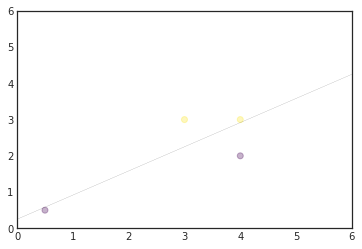

In [111]:
[w,b] =perception_prime(X_train,y_train,0.1)
print('w : ',w)
print('b : ',b )
plt.xlim(0,6)
plt.ylim(0,6)
plt.style.use('seaborn-white')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train[:,0],alpha=0.3,cmap='viridis')
x_line =np.linspace(-6,6,1000)
y_line =-1*(w[0]/w[1])*x_line-(b/w[1])
plt.plot(x_line,y_line,'-k',linewidth=0.1)

y[:,0]  (4,)
alpha[:,0]  (4,)
gram[:,i]  (4,)
alpha :  [[0.11]
 [0.13]
 [0.03]
 [0.04]]
b :  [-0.03]
(4, 1)
(4, 2)
w : [-0.09  0.14]
b  [-0.03]


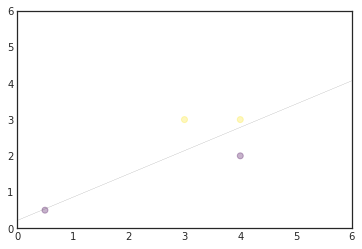

In [121]:
[alpha,b] =perception_dual(X_train,y_train,lr=0.01)
print('alpha : ',alpha)
print('b : ',b )
print((alpha*y_train).shape)
print(np.multiply(alpha*y_train,X_train).shape)

w =np.sum(np.multiply(alpha*y_train,X_train),axis=0)
w =w.T
print('w :',w)
print('b ',b)
plt.xlim(0,6)
plt.ylim(0,6)
plt.style.use('seaborn-white')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train[:,0],alpha=0.3,cmap='viridis')
x_line =np.linspace(-6,6,1000)
y_line =-1*(w[0]/w[1])*x_line-(b/w[1])
plt.plot(x_line,y_line,'-k',linewidth=0.1)